In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random
from datasets import load_from_disk
import json

# 결과 값 분석 - Valid

In [2]:
def find_ans(txt):
    return txt['text'][0]
def valid_result(dataset_path, pred_path, print_result, return_result):
    dataset = load_from_disk(dataset_path)
    valid_dataset = dataset["validation"]
    valid_df=pd.DataFrame(valid_dataset)
    valid_df['con_len'] = valid_df['context'].apply(lambda x: len(x))
    valid_df['qu_len'] = valid_df['question'].apply(lambda x: len(x))
    valid_df['ans_len']=[len(valid_df['answers'][i]['text'][0]) for i in range(len(valid_df))]

    valid_df['answer_text'] = valid_df["answers"].apply(find_ans)

    with open(pred_path) as f:
        prediction = json.load(f)
    pred_id = []
    pred_ans = []
    for k,v in enumerate(prediction):
        pred_id.append(v)
        pred_ans.append(prediction[v])
    pred_df = pd.DataFrame({'id': pred_id, 'pred_ans': pred_ans})

    valid_pred_df = pd.merge(valid_df, pred_df, on='id')
    valid_pred_df = valid_pred_df[['title','context','question','answer_text','pred_ans','con_len','qu_len','ans_len']]
    corect_df = valid_pred_df.loc[valid_pred_df['answer_text']==valid_pred_df['pred_ans']]
    incorect_df = valid_pred_df.loc[valid_pred_df['answer_text']!=valid_pred_df['pred_ans']]
    
    if print_result:
        plt.figure(figsize=(10, 5))
        plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=1)

        plt.subplot(3,2,1)
        plt.plot(sorted(corect_df["con_len"]))
        plt.xlabel("Data index")
        plt.ylabel("Length of Data")
        plt.title("Length of Correct Context Data")

        plt.subplot(3,2,2)
        plt.plot(sorted(incorect_df["con_len"]))
        plt.xlabel("Data index")
        plt.ylabel("Length of Data")
        plt.title("Length of Incorrect Context Data")

        plt.subplot(3,2,3)
        plt.plot(sorted(corect_df["qu_len"]))
        plt.xlabel("Data index")
        plt.ylabel("Length of Data")
        plt.title("Length of Correct Question Data")

        plt.subplot(3,2,4)
        plt.plot(sorted(incorect_df["qu_len"]))
        plt.xlabel("Data index")
        plt.ylabel("Length of Data")
        plt.title("Length of Incorrect Question Data")

        plt.subplot(3,2,5)
        plt.plot(sorted(corect_df["ans_len"]))
        plt.xlabel("Data index")
        plt.ylabel("Length of Data")
        plt.title("Length of Correct Answer Data")

        plt.subplot(3,2,6)
        plt.plot(sorted(incorect_df["ans_len"]))
        plt.xlabel("Data index")
        plt.ylabel("Length of Data")
        plt.title("Length of Incorrect Answer Data")

        plt.show()
        
        plt.figure(figsize=(10, 5))
        plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=1)

        plt.subplot(3,2,1)
        plt.hist(sorted(corect_df["con_len"]))
        plt.xlabel("Length")
        plt.ylabel("Frequency")
        plt.title("Frequency of Correct Context Data")

        plt.subplot(3,2,2)
        plt.hist(sorted(incorect_df["con_len"]))
        plt.xlabel("Length")
        plt.ylabel("Frequency")
        plt.title("Frequency of Incorrect Context Data")

        plt.subplot(3,2,3)
        plt.hist(sorted(corect_df["qu_len"]))
        plt.xlabel("Length")
        plt.ylabel("Frequency")
        plt.title("Frequency of Correct Question Data")

        plt.subplot(3,2,4)
        plt.hist(sorted(incorect_df["qu_len"]))
        plt.xlabel("Length")
        plt.ylabel("Frequency")
        plt.title("Frequency of Incorrect Question Data")

        plt.subplot(3,2,5)
        plt.hist(sorted(corect_df["ans_len"]))
        plt.xlabel("Length")
        plt.ylabel("Frequency")
        plt.title("Frequency of Correct Answer Data")

        plt.subplot(3,2,6)
        plt.hist(sorted(incorect_df["ans_len"]))
        plt.xlabel("Length")
        plt.ylabel("Frequency")
        plt.title("Frequency of Incorrect Answer Data")
        
        plt.show()
        
        print('맞춘 개수: ', len(valid_pred_df)-len(incorect_df))
        print(corect_df[["con_len","qu_len","ans_len"]].describe())
        print('틀린 개수: ', len(incorect_df))
        print(incorect_df[["con_len","qu_len","ans_len"]].describe())
    if return_result:
        return corect_df, incorect_df

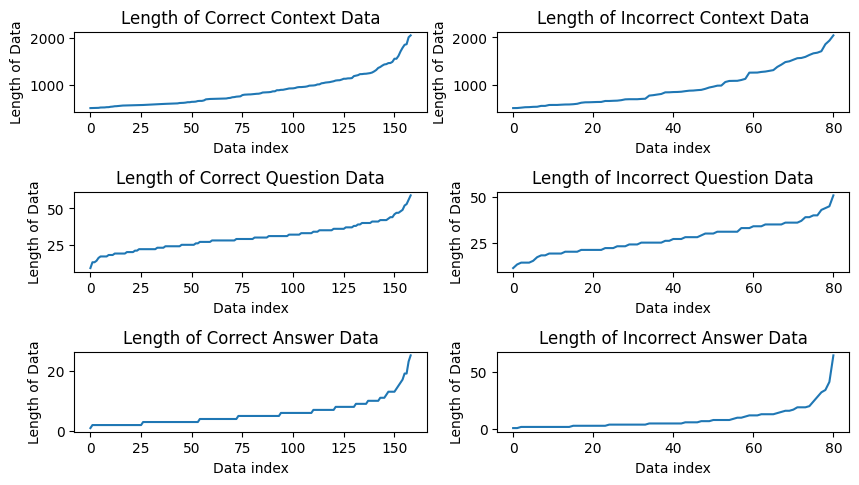

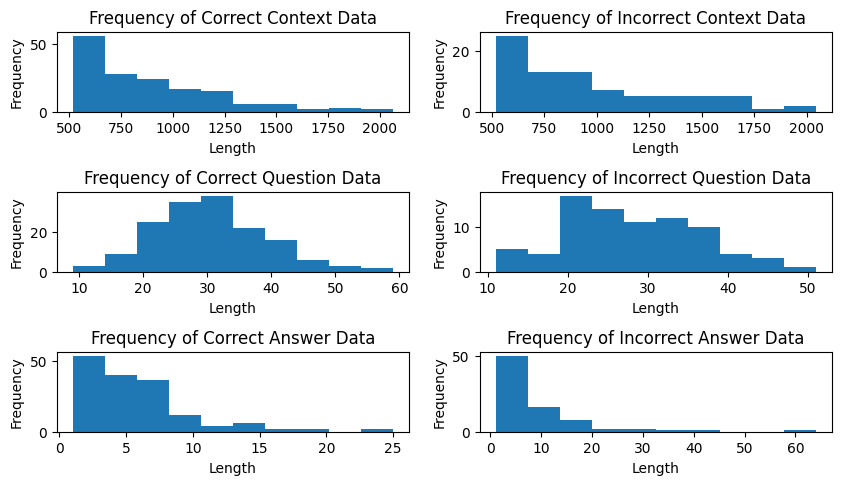

맞춘 개수:  159
           con_len      qu_len     ans_len
count   159.000000  159.000000  159.000000
mean    894.169811   30.100629    5.836478
std     339.808718    8.868373    4.081254
min     517.000000    9.000000    1.000000
25%     611.500000   24.000000    3.000000
50%     808.000000   29.000000    5.000000
75%    1073.500000   35.000000    7.000000
max    2064.000000   59.000000   25.000000
틀린 개수:  81
           con_len     qu_len    ans_len
count    81.000000  81.000000  81.000000
mean    961.000000  27.419753   9.024691
std     395.221489   8.212588  10.041135
min     518.000000  11.000000   1.000000
25%     643.000000  21.000000   3.000000
50%     854.000000  27.000000   5.000000
75%    1262.000000  34.000000  12.000000
max    2043.000000  51.000000  64.000000


In [3]:
corect_df, incorect_df = valid_result(dataset_path="/opt/ml/input/data/train_dataset",
                                      pred_path = "/opt/ml/code_sh/outputs/010201_00_00.json", 
                                      print_result=True, return_result=True)

In [4]:
corect_df

,title,context,question,answer_text,pred_ans,con_len,qu_len,ans_len
0,전효숙,"순천여자고등학교 졸업, 1973년 이화여자대학교를 졸업하고 1975년 제17회 사법...",처음으로 부실 경영인에 대한 보상 선고를 받은 회사는?,한보철강,한보철강,625,30,4
1,스토우빌선,요크 카운티 동쪽에 처음으로 여객 열차 운행이 시작한 시점은 1868년 토론토 & ...,스카버러 남쪽과 코보콘그 마을의 철도 노선이 처음 연장된 연도는?,1871년,1871년,964,36,5
2,촐라,"촐라 정부\n 촐라의 정부 체제는 전제군주제였으며,2001 촐라의 군주는 절대적인 ...",촌락에서 운영 위원 후보자 이름을 쓰기위해 사용된 것은?,나뭇잎,나뭇잎,611,31,3
3,백조 기사,프랑스의 십자군 무훈시는 1099년 예루살렘 왕국의 통치자가 된 고드프루아 드 부용...,로타이르가 백조를 구하기 위해 사용한 것은?,금대야,금대야,1391,24,3
6,자수장,"수를 놓을 때에 사용하는 기법을 문양의 형태에 따라 나누어 보면 선을 잇는 수, 면...",징금수는 서양 자수의 어떤 기법과 같은 기술을 사용하는가?,코칭 스티치,코칭 스티치,597,32,6
...,...,...,...,...,...,...,...,...
233,미헤소케어족,"과거에 미헤소케어족은 지금보다 훨씬 넓은, 과테말라 태평양 연안(소코누스코 지역)에...",데이비드 스튜어트는 누구의 해독방법을 다른 지협 문자 자료에 적용해보았나요?,코프먼과 저스티슨,코프먼과 저스티슨,763,42,9
234,인사고과,인사고과는 조직내의 각종 직무에 종사하고 있는 종업원의 근무성적이나 능력 등을 그 ...,인적 성과와 더불어 기업의 성과를 평가하는 요소는?,물적 성과(物的成果),물적 성과(物的成果),805,28,11
235,전단 (제나라),"연나라 군대의 사령관이 악의에서 기겁으로 교체되자, 전단은 스스로 신령의 계시를 받...",전단이 연나라와의 전쟁에서 승리했을 당시 제나라의 왕은 누구인가?,제 양왕,제 양왕,1254,36,4
236,티칼,현재 우리가 볼 수 있는 티칼의 모습은 펜실베이니아 대학교와 과테말라 정부의 협조 ...,공놀이 경기장 중 일부는 어디에 위치하고 있나?,'일곱 개의 신전 광장','일곱 개의 신전 광장',897,26,13


In [5]:
incorect_df

,title,context,question,answer_text,pred_ans,con_len,qu_len,ans_len
4,탈관료제화,탈관료제화는 현대사회에서 관료제 성격이 약화되는 현상이다. 현대사회에서 관료제는 약...,의견을 자유롭게 나누는 것은 조직 내 어떤 관계에서 가능한가?,수평적 관계,위계 서열적 관계,608,34,6
5,마쓰에 소요 사건,마쓰에 소요 사건(마쓰에소조지켄)은 1945년 8월 24일 일본 제국 시마네현의 현...,1945년 쇼와천황의 항복 선언이 발표된 라디오 방송은?,옥음방송,옥음방송(라디오 방송),1284,31,4
7,감염내과,감염내과 전문의들은 일반적으로 다른 진료과의 의사들에게 복잡한 감염병에 대한 고문 ...,다른 과 의사들은 감염내과 전문의들로부터 어떤 것에 대해 조언을 받는가?,복잡한 감염병,열병의 감염원을 밝히기 위한,536,40,7
8,노트르담 다리,예부터 노트르담 다리는 큰 다리(Grand-pont)라고 불리면서 센 강을 가로지르...,루이 14세의 왕비 마리아 테래사는 어느 나라 공주인가?,스페인,프랑스,1090,31,3
14,산리즈카 투쟁,남은 사유지를 가진 지주들은 정부측의 한 층 강한 압력을 받았으나 반대동맹에 남겠다...,반대동맹이 공산당과 갈라서겠다고 얘기한 날은 언제인가?,1967년 11월 15일,1967년 8월 16일,1592,30,13
...,...,...,...,...,...,...,...,...
224,홍유,"918년 배현경, 신숭겸, 복지겸과 함께 몰래 모의하여 밤에 태조 왕건의 집으로 찾...",배현경과 신숭겸 등이 일을 꾀하여 찾아간 인물의 부인은 누구인가?,제1부인,태조 왕건,1382,36,4
225,교황 클레멘스 5세,클레멘스 5세는 중국의 복음화를 위해 이탈리아의 프란치스코회 선교사 조반니 다 몬테...,십자군 설교를 통해 집한한 자들은?,빈자의 십자군,맘루크를 몰아내기 위한 십자군 설교를 지시했다. 그 결과 1309년 7월 아비뇽 성...,594,19,7
231,버트런드 러셀,러셀은 1890년 케임브리지 대학교의 트리니티 칼리지에 장학생으로 들어갔다. 그는 ...,러셀은 누구의 가족과 함께 1889년 파리 박람회에 갔는가?,퀘이커 교도였던 앨리스 페어살 스미스,앨리스 페어살 스미스,667,33,20
237,윤치호,1940년 5월 1일 오전 창씨개명에 비협조적이라는 이유로 조선총독부 경무국에서 소...,창씨개명령의 시행일을 미루는 것을 수락한 인물은?,미나미 지로,미나미 지로 총독,1314,27,6


In [8]:
incorect_df.to_csv('incorect_df.json',index = False)